# Grad-CAM experiments

Generating Grad-CAM heat-maps at different points along a ResNet-34.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
!curl https://course-v3.fast.ai/setup/colab | bash

In [0]:
!apt-get -qq install ffmpeg
# restart kernel after install

In [0]:
DRIVE_BASE_PATH = "/content/gdrive/My\ Drive/Colab\ Notebooks/"

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from fastai import *
from fastai.vision import *

In [0]:
from fastai import version as fastai_version

In [0]:
print(f'fastai version -> {fastai_version.__version__}')

fastai version -> 1.0.32


In [0]:
bs = 32  #batch size

In [0]:
path = untar_data(URLs.PETS)/'images'

In [0]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=.2, p_lighting=.2)
src = ImageItemList.from_folder(path).random_split_by_pct(0.2, seed=2)

In [0]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.label_from_re(r'([^/]+)_\d+.jpg$')
           .transform(tfms, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

### Training data

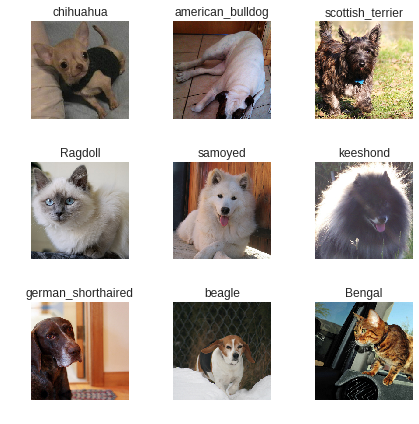

In [0]:
data = get_data(224, bs)
data.show_batch(rows=3, figsize=(6,6))

In [0]:
data = get_data(352,16)

In [104]:
data.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [0]:
# creating combinations of classes for quick googling

# cats = []
# dogs = []

# for el in data.classes[:12]:
#     cats.append(el.replace('_', ' '))

# for el in data.classes[12:]:
#     dogs.append(el.replace('_', ' '))


# import itertools


# both = list(itertools.product(cats, dogs))
# for el in both:
#     print(f'{el[0]} and {el[1]}')

# !ls {path/'models'}
# !cp {path/'models/352.pth'} {DRIVE_BASE_PATH}saved_models/fastai/pets_more/
# !cp {DRIVE_BASE_PATH}saved_models/fastai/pets_more/352.pth {path/'models/'}
# !ls {path/'models/'}

In [12]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, bn_final=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 72355786.57it/s]


In [0]:
!cp {DRIVE_BASE_PATH}saved_models/fastai/pets_more/352.pth {path/'models/'}

### Loading pre-trained weights

In [0]:
learn.load('352');

### Test images containing objects belonging to 2 classes

In [0]:
test_data ={
  "pics": {
    "bengal_and_beagle": "https://saveoursavannahs.files.wordpress.com/2012/03/brigittec0316.jpg",
    "bengal_and_pug": "https://i.pinimg.com/736x/ab/62/50/ab62503902a3f1eb94267b46ce6d8145--yellow-raincoat-the-pug.jpg",
    "bengal_and_basset_hound": "http://www.pure-spirit.com/images/stories/Testimonials/amy%20marotz.jpg",
    "birman_and_havanese": "http://photos-ak.sparkpeople.com/nw/4/9/l492415053.jpg",
    "maine_coon_and_pug": "http://media.istockphoto.com/photos/cat-and-dog-looking-at-camera-picture-id163159042?k=6&m=163159042&s=612x612&w=0&h=GWTYuAH19MvL0klOf7H4TPNwYFFfoi8-hnwGMaJ7sc0=",
    "persian_and_beagle": "https://i.pinimg.com/originals/2c/af/a1/2cafa142c3dcd49d04d9247964dfc3fe.jpg",
    "persian_and_beagle_pic2": "https://www.kimballstock.com/pix/DOK/01/DOK-01-RK0692-01P.JPG",
    "basset_hound_and_boxer": "https://format-com-cld-res.cloudinary.com/image/private/s--XJarCcDs--/c_limit,g_center,h_1200,w_65535/a_auto,fl_keep_iptc.progressive,q_95/v1/dbad09bdb9b37a12cd2459755bb4d1cb/1.jpg",
    "beagle_and_english_cocker_spaniel": "https://i1.pickpik.com/photos/90/163/761/el-salvador-walk-park-dogs-preview.jpg",
    "beagle_and_keeshond": "https://amberstang.files.wordpress.com/2009/03/n1035097795_256968_7530.jpg"
  }
}

In [0]:
!mkdir test_pics

In [30]:
for el in test_data["pics"]:
#     print(test_data["pics"][el])
    print(f'wget -q "{test_data["pics"][el]}" -O {"test_pics/"+el+".jpg"}')
    !wget -q "{test_data["pics"][el]}" -O {"test_pics/"+el+".jpg"}
    

wget -q "https://saveoursavannahs.files.wordpress.com/2012/03/brigittec0316.jpg" -O test_pics/bengal_and_beagle.jpg
wget -q "https://i.pinimg.com/736x/ab/62/50/ab62503902a3f1eb94267b46ce6d8145--yellow-raincoat-the-pug.jpg" -O test_pics/bengal_and_pug.jpg
wget -q "http://www.pure-spirit.com/images/stories/Testimonials/amy%20marotz.jpg" -O test_pics/bengal_and_basset_hound.jpg
wget -q "http://photos-ak.sparkpeople.com/nw/4/9/l492415053.jpg" -O test_pics/birman_and_havanese.jpg
wget -q "http://media.istockphoto.com/photos/cat-and-dog-looking-at-camera-picture-id163159042?k=6&m=163159042&s=612x612&w=0&h=GWTYuAH19MvL0klOf7H4TPNwYFFfoi8-hnwGMaJ7sc0=" -O test_pics/maine_coon_and_pug.jpg
wget -q "https://i.pinimg.com/originals/2c/af/a1/2cafa142c3dcd49d04d9247964dfc3fe.jpg" -O test_pics/persian_and_beagle.jpg
wget -q "https://www.kimballstock.com/pix/DOK/01/DOK-01-RK0692-01P.JPG" -O test_pics/persian_and_beagle_pic2.jpg
wget -q "https://format-com-cld-res.cloudinary.com/image/private/s--XJarCcD

In [0]:
test_path = Path('test_pics')

In [0]:
from math import ceil

In [0]:
def see_test_files(test_dir_path):
    test_files = test_dir_path.ls()
    
    num_cols = 4
    num_rows = ceil(len(test_files)/num_cols)
    fig,ax = plt.subplots(num_rows,num_cols)
    fig.set_size_inches(num_cols*3,num_rows*3)

    ind = 0
    for i in range(num_rows):
        for j in range(num_cols):

            if ind>=len(test_files):
                break
                
            x = open_image(test_files[ind])
            xb,_ = data.one_item(x)
            xb_im = Image(data.denorm(xb)[0])
            xb_im.show(ax[i,j])
            classes = test_files[ind].stem.split("_pic")[0].split("_and_")
            ax[i,j].set_title(f'{classes[0]}, {classes[1]}')
            ind+=1

    plt.show()

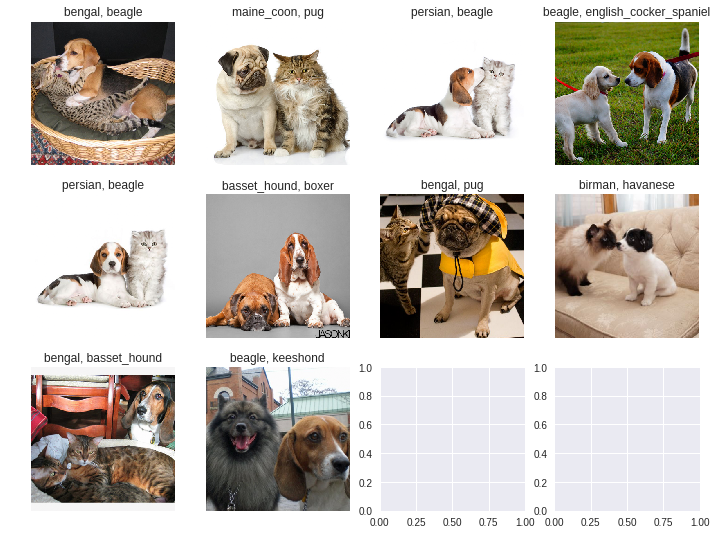

In [38]:
see_test_files(test_path)

In [0]:
from fastai.callbacks.hooks import *

In [0]:
m = learn.model.eval();

## Class-discriminative heat-maps along the network


In [0]:
def class_discriminative_gradients_multi(xb, cat):
    hooks_a = []
    hooks_g = []
    layer_names = []
    
    hooks_a.append(hook_output(m[0][3]))
    hooks_g.append(hook_output(m[0][3], grad=True))
    
    layer_names.append('first conv')

    for ind in [4,5,6,7]:
        for i,el in enumerate(learn.model[0][ind]):
            hooks_a.append(hook_output(el))
            hooks_g.append(hook_output(el, grad=True))
            layer_names.append(f'layer-{ind-3} - conv-{i+1}')
            # layer 1 (layer is combination of resnet blocks) is model[0][4]
    
    preds = m(xb)
    preds[0,int(cat)].backward()
    
    for hook in hooks_a:
        hook.remove()
        
    for hook in hooks_g:
        hook.remove()
    
    return hooks_a,hooks_g,layer_names

In [0]:
class_dict = {}
for i,el in enumerate(data.classes):
    class_dict[el.lower()] = i

In [0]:
def plot_class_discriminative_heatmaps_multi(path, cat, relu=True):
    
    x = open_image(path)
    xb,_ = data.one_item(x)
    xb_im = Image(data.denorm(xb)[0])
    xb = xb.cuda()
    
    y = class_dict[cat]
    
    hooks_a,hooks_g,_ = class_discriminative_gradients_multi(xb,y)
    
    num_cols = 4
    num_rows = ceil(len(hooks_a)/num_cols)

    fig,ax = plt.subplots(num_rows,num_cols)
    fig.set_size_inches(num_cols*3,num_rows*3)

    ind = 0
    
    for i in range(num_rows):
        for j in range(num_cols):
            
            if ind>=len(hooks_a):
                break
            
            acts = hooks_a[ind].stored[0].cpu()
            grad = hooks_g[ind].stored[0][0].cpu()

            grad_chan = grad.mean(1).mean(1)
            mult = (acts*grad_chan[...,None,None]).mean(0)

            if relu:
                mult = F.relu(mult)

            xb_im.show(ax[i,j])
            ax[i,j].imshow(mult, alpha=0.6, extent=(0,352,352,0),
                      interpolation='bilinear', cmap='magma');
            ind+=1
            
    plt.show()

In [0]:
def plot_for_both_classes(path):
    
    classes = path.stem.split("_pic")[0].split("_and_")
    
    print(f'Test image of {classes[0]} and {classes[1]}.')
    
    x = open_image(path)
    xb,_ = data.one_item(x)
    xb_im = Image(data.denorm(xb)[0])
    xb_im.show()
    
    pred = learn.predict(x)[0]
    
    print(f'\nModel classifies it as {pred}.')
    
    classes = path.stem.split("_pic")[0].split("_and_")
    print(f'Grad-CAM heat-maps for maximising --> {classes[0]} <-- score.')
    plot_class_discriminative_heatmaps_multi(path, classes[0])
    print('\n\n')
    print(f'Grad-CAM heat-maps for maximising --> {classes[1]} <-- score.')
    plot_class_discriminative_heatmaps_multi(path, classes[1])
    print('\n\n\t\t-------------\n\n')

Test image of bengal and beagle.

Model classifies it as beagle.
Grad-CAM heat-maps for maximising --> bengal <-- score.


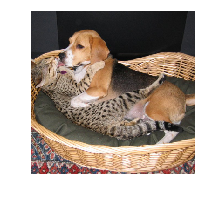

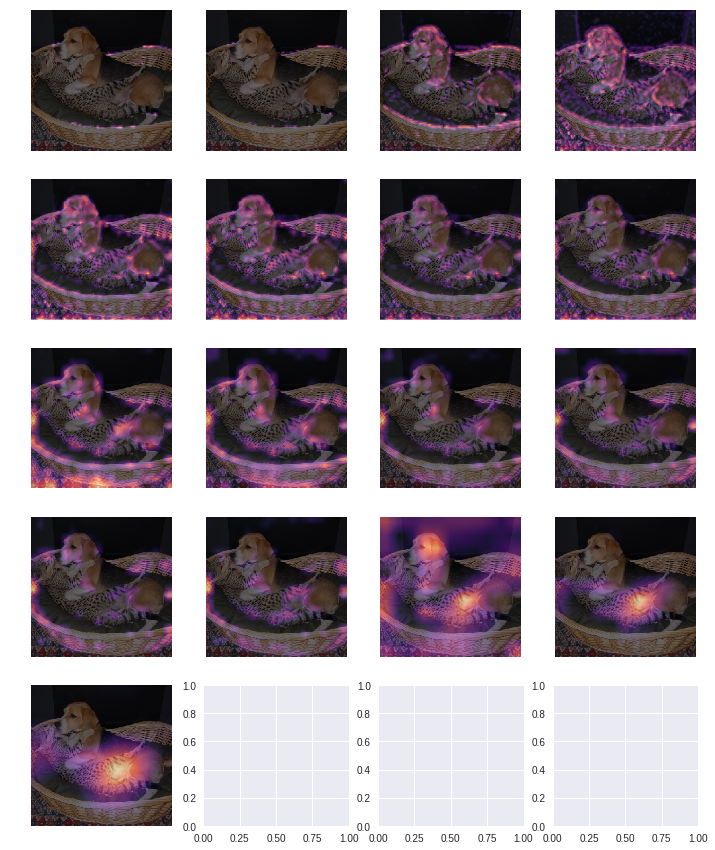




Grad-CAM heat-maps for maximising --> beagle <-- score.


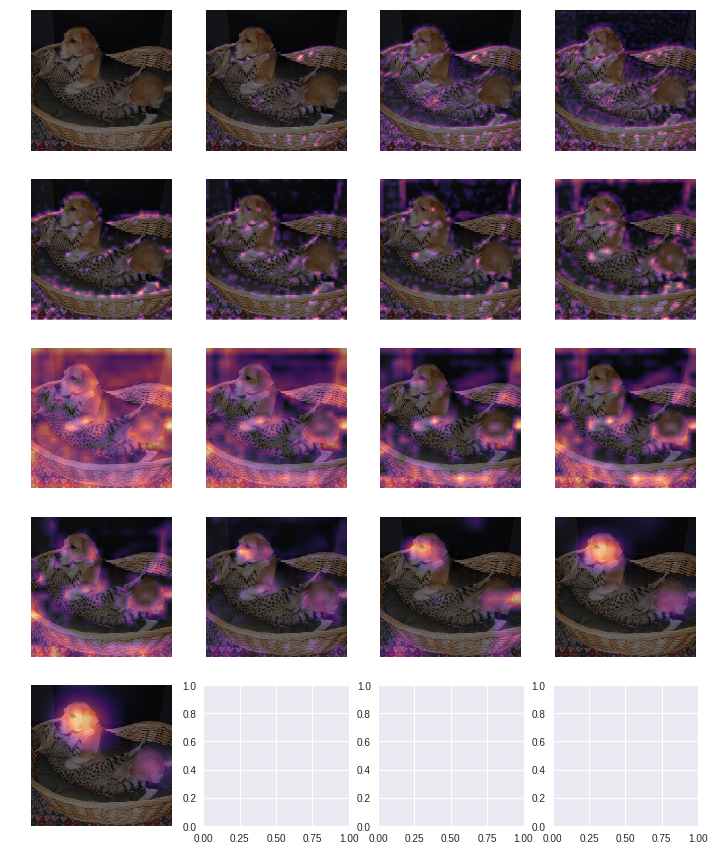



		-------------


Test image of maine_coon and pug.

Model classifies it as Maine_Coon.
Grad-CAM heat-maps for maximising --> maine_coon <-- score.


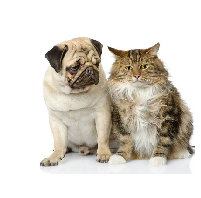

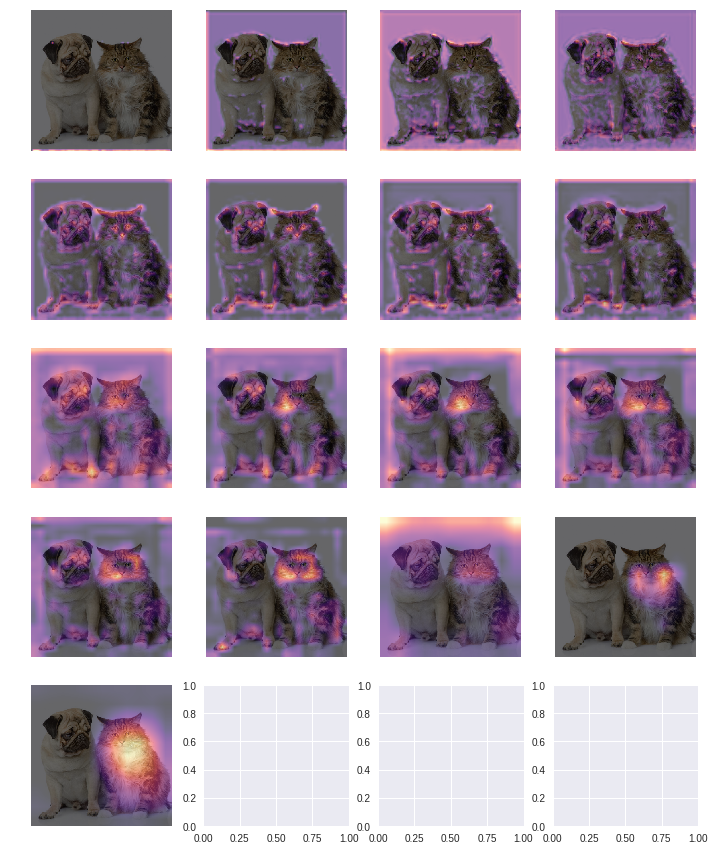




Grad-CAM heat-maps for maximising --> pug <-- score.


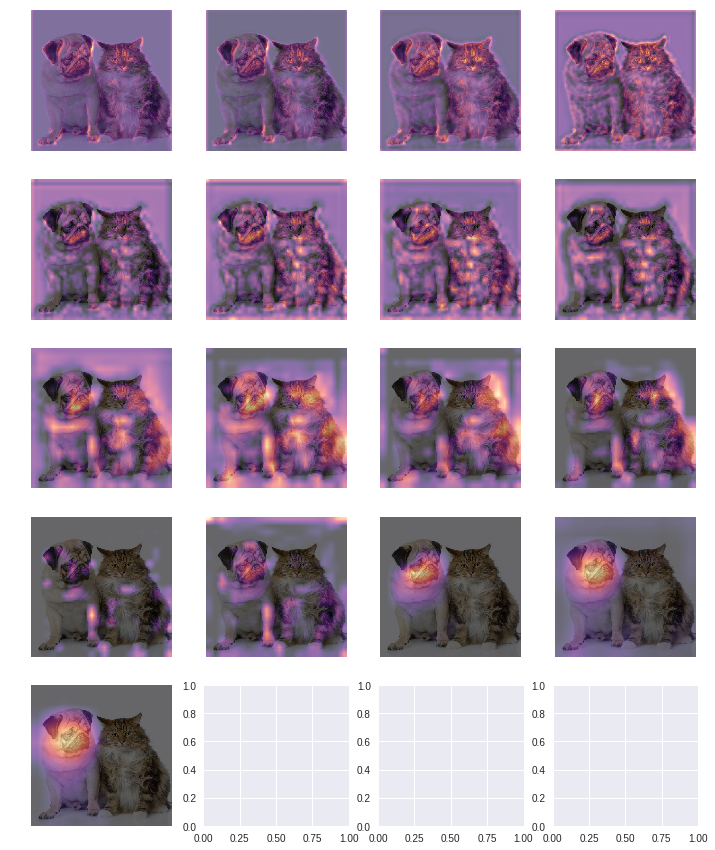



		-------------


Test image of persian and beagle.

Model classifies it as basset_hound.
Grad-CAM heat-maps for maximising --> persian <-- score.


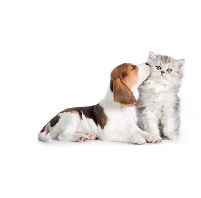

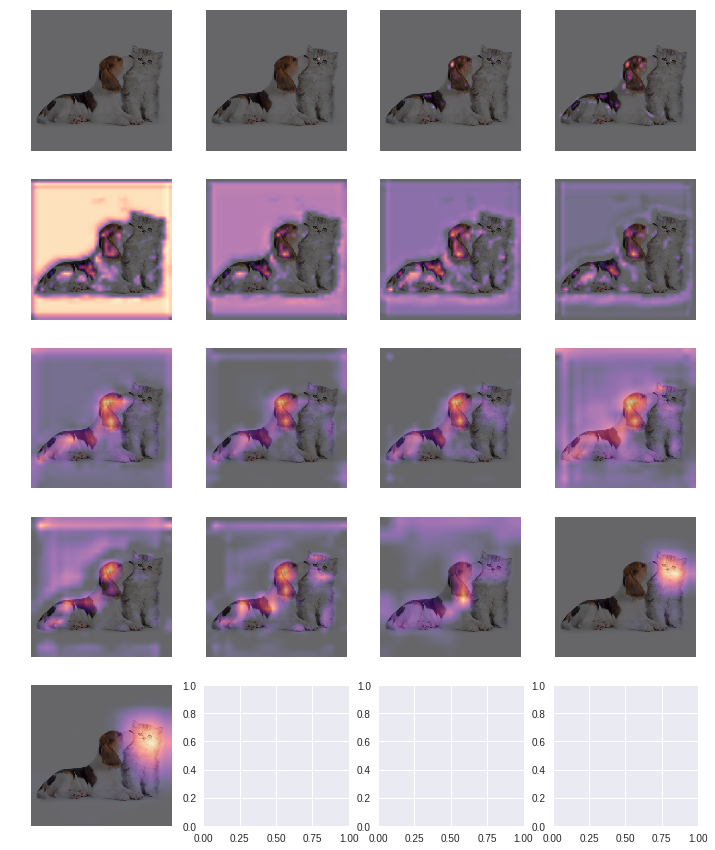




Grad-CAM heat-maps for maximising --> beagle <-- score.


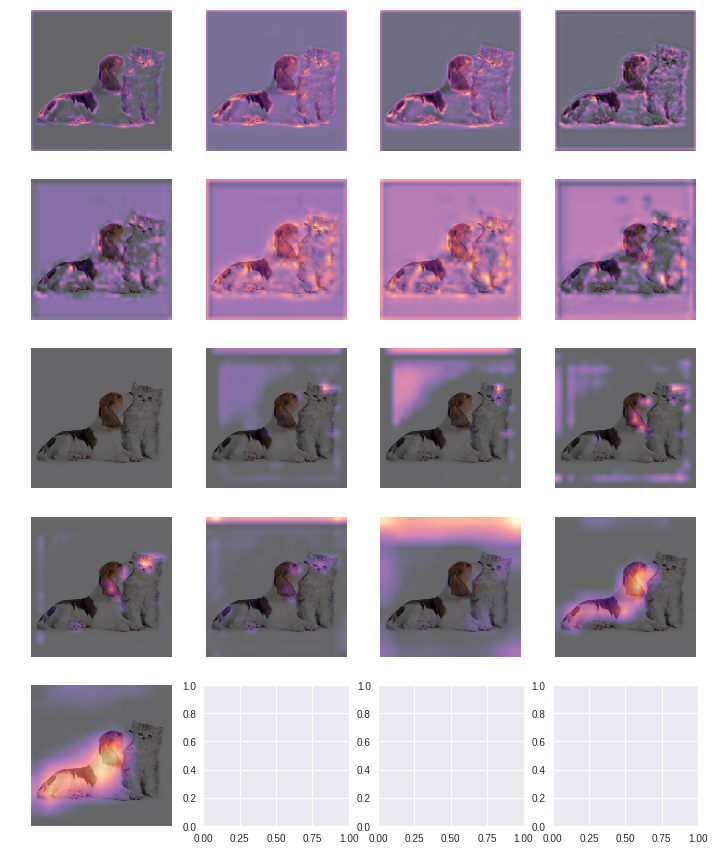



		-------------


Test image of beagle and english_cocker_spaniel.

Model classifies it as beagle.
Grad-CAM heat-maps for maximising --> beagle <-- score.


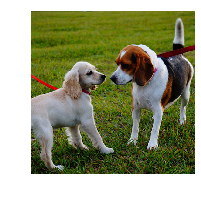

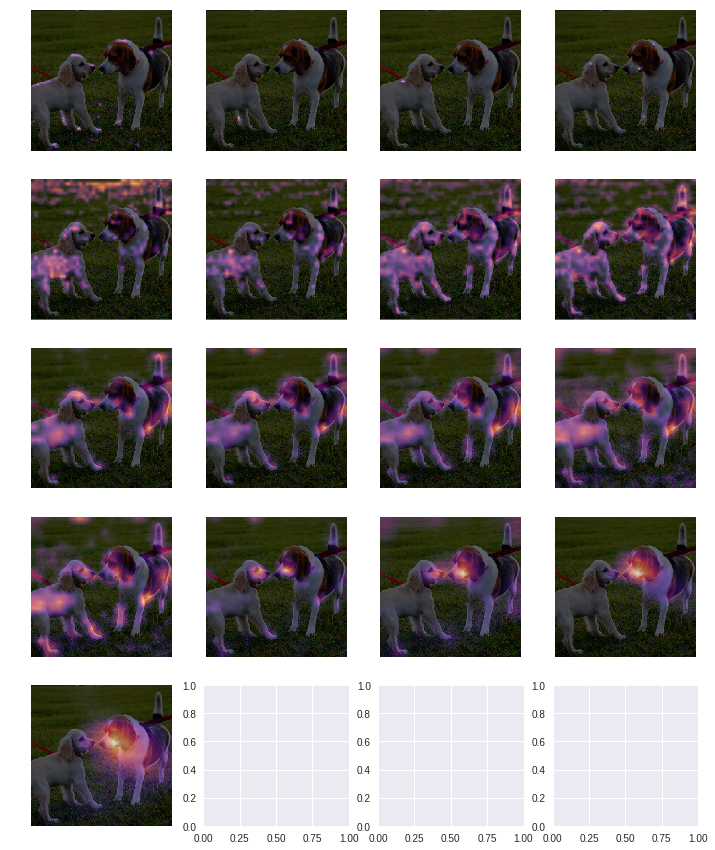




Grad-CAM heat-maps for maximising --> english_cocker_spaniel <-- score.


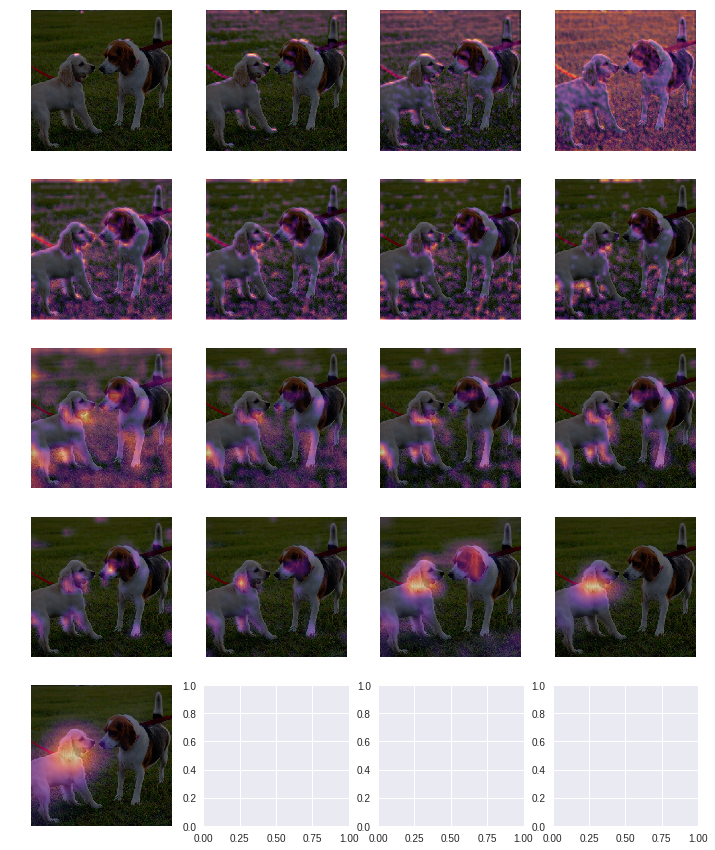



		-------------


Test image of persian and beagle.

Model classifies it as beagle.
Grad-CAM heat-maps for maximising --> persian <-- score.


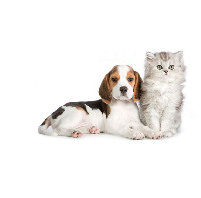

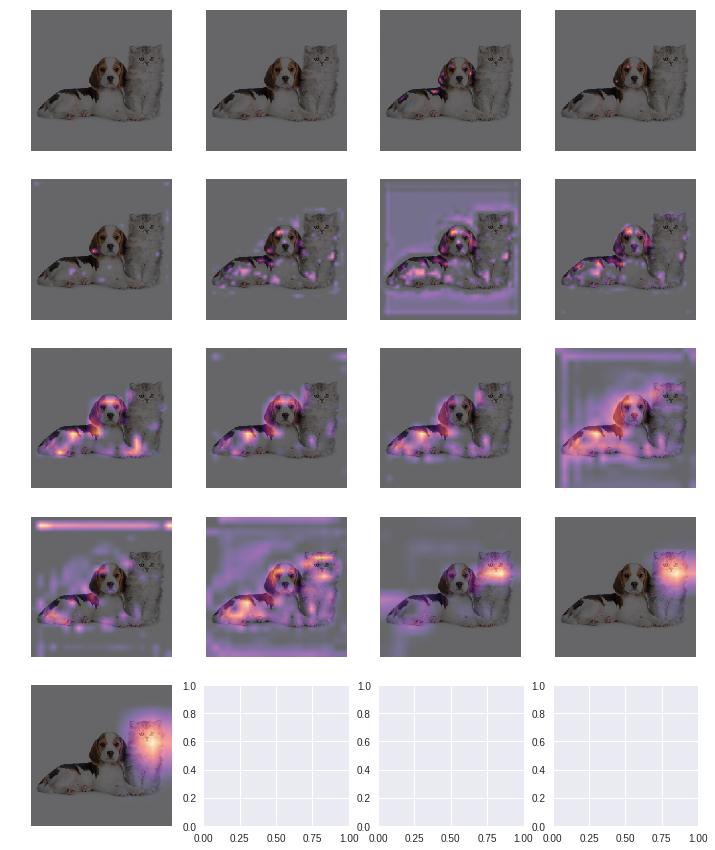




Grad-CAM heat-maps for maximising --> beagle <-- score.


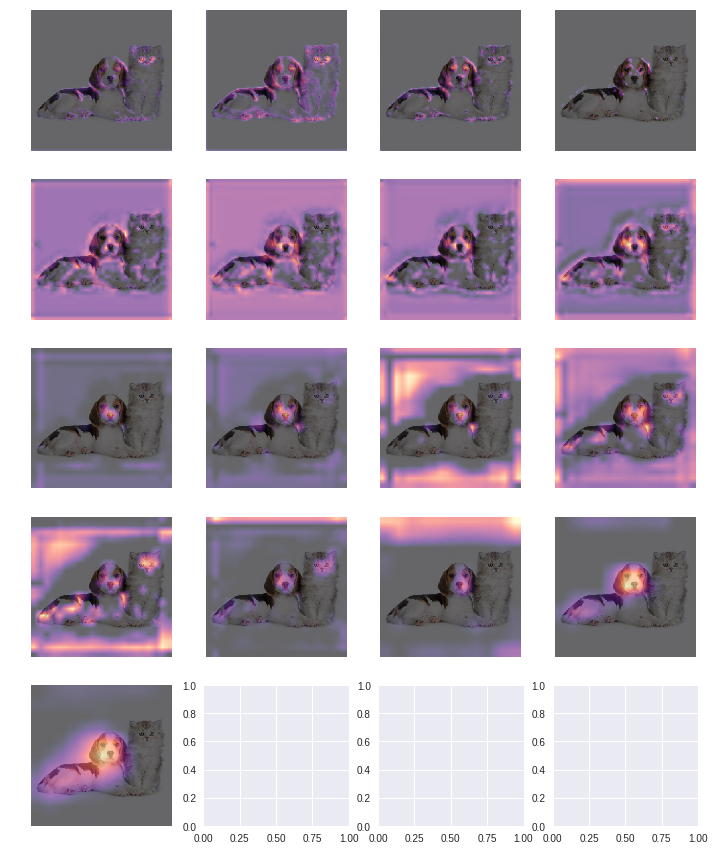



		-------------




In [102]:
for img in test_path.ls()[:5]:
    plot_for_both_classes(img)

## References:
- [Grad-CAM:
Visual Explanations from Deep Networks via Gradient-based Localization](https://arxiv.org/abs/1610.02391)
- [fastai's Deep Learning Part-1 (2018) MOOC](https://www.fast.ai/)